In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# from joblib import Parallel, delayedfrom dask.distributed import LocalCluster

In [ ]:
data = pd.read_csv('data/data.csv') # read the data
dd_data = dd.read_csv('data/data.csv')
print("shape: ",data.shape)

shape:  (39726, 13)


In [ ]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39726 entries, 0 to 39725
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Applicant_ID                 39726 non-null  int64  
 1   Annual_Income                39725 non-null  float64
 2   Applicant_Age                39725 non-null  float64
 3   Work_Experience              39725 non-null  float64
 4   Marital_Status               39725 non-null  object 
 5   House_Ownership              39725 non-null  object 
 6   Vehicle_Ownership(car)       39725 non-null  object 
 7   Occupation                   39725 non-null  object 
 8   Residence_City               39725 non-null  object 
 9   Residence_State              39725 non-null  object 
 10  Years_in_Current_Employment  39725 non-null  float64
 11  Years_in_Current_Residence   39725 non-null  float64
 12  Loan_Default_Risk            39725 non-null  float64
dtypes: float64(6), i

In [ ]:
data.head(10)

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655.0,76.0,0.0,single,rented,no,Psychologist,Jalandhar,Punjab,0.0,12.0,0.0
1,80185,9259353.0,37.0,18.0,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12.0,11.0,0.0
2,19865,1509721.0,66.0,8.0,single,rented,no,Drafter,Indore,Madhya_Pradesh,4.0,12.0,0.0
3,76700,5867312.0,43.0,1.0,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1.0,13.0,1.0
4,92992,7223191.0,44.0,9.0,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9.0,13.0,0.0
5,76435,1161425.0,45.0,14.0,single,rented,no,Biomedical_Engineer,Bongaigaon,Assam,13.0,13.0,0.0
6,84005,7059529.0,63.0,8.0,single,rented,yes,Fashion_Designer,Katihar,Bihar,8.0,13.0,1.0
7,80918,555485.0,31.0,15.0,single,rented,yes,Magistrate,Sikar,Rajasthan,12.0,11.0,0.0
8,60768,5395461.0,71.0,10.0,single,rented,no,Technology_specialist,Chinsurah,West_Bengal,5.0,10.0,0.0
9,50075,4772948.0,46.0,17.0,single,rented,no,Air_traffic_controller,Muzaffarnagar,Uttar_Pradesh,11.0,14.0,1.0


In [ ]:
print("\nInfo about the class\n")
print(data['Loan_Default_Risk'].describe(),"\n")

print(data['Loan_Default_Risk'].value_counts())
data['Loan_Default_Risk'].value_counts().sort_index(ascending=True).to_frame().style.bar(vmin=0, vmax=len(data))


Info about the class

count    39725.00000
mean         0.12944
std          0.33569
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: Loan_Default_Risk, dtype: float64 

0.0    34583
1.0     5142
Name: Loan_Default_Risk, dtype: int64


,Loan_Default_Risk
0.000000,34583
1.000000,5142


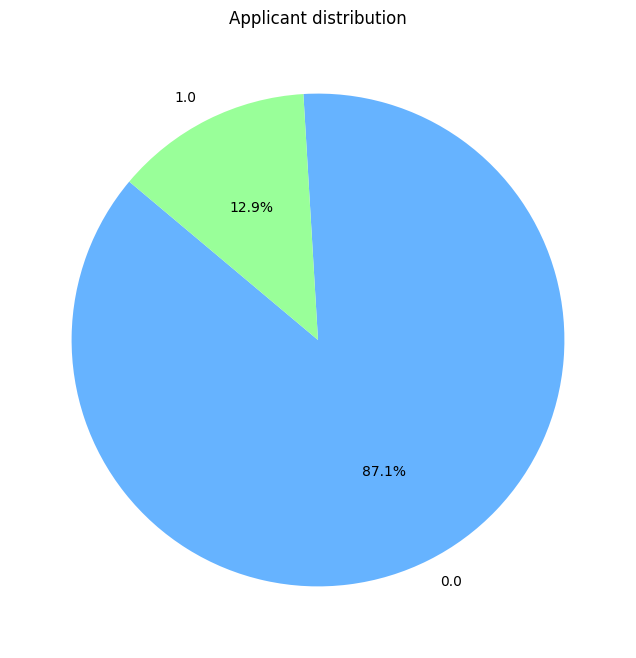

In [ ]:
class_counts = data['Loan_Default_Risk'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6'])
plt.title('Applicant distribution')
plt.show()


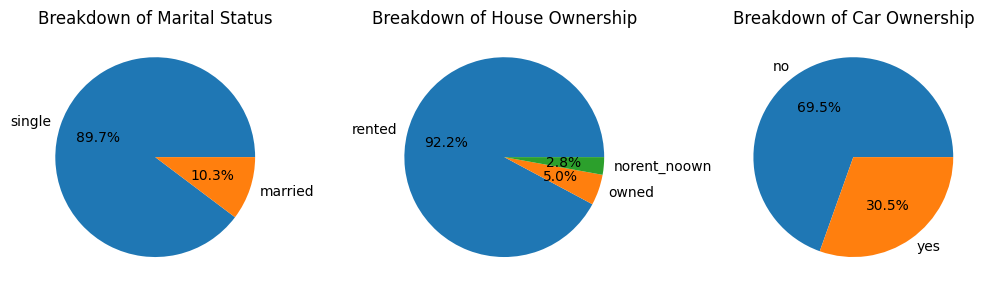

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(10,5))
axes[0].pie(data['Marital_Status'].value_counts(),labels = data['Marital_Status'].value_counts().index,autopct='%1.1f%%')
axes[0].set_title('Breakdown of Marital Status')
axes[1].pie(data['House_Ownership'].value_counts(),labels = data['House_Ownership'].value_counts().index,autopct='%1.1f%%')
axes[1].set_title('Breakdown of House Ownership')
axes[2].pie(data['Vehicle_Ownership(car)'].value_counts(),labels = data['Vehicle_Ownership(car)'].value_counts().index,autopct='%1.1f%%')
axes[2].set_title('Breakdown of Car Ownership')
plt.tight_layout()
plt.show()

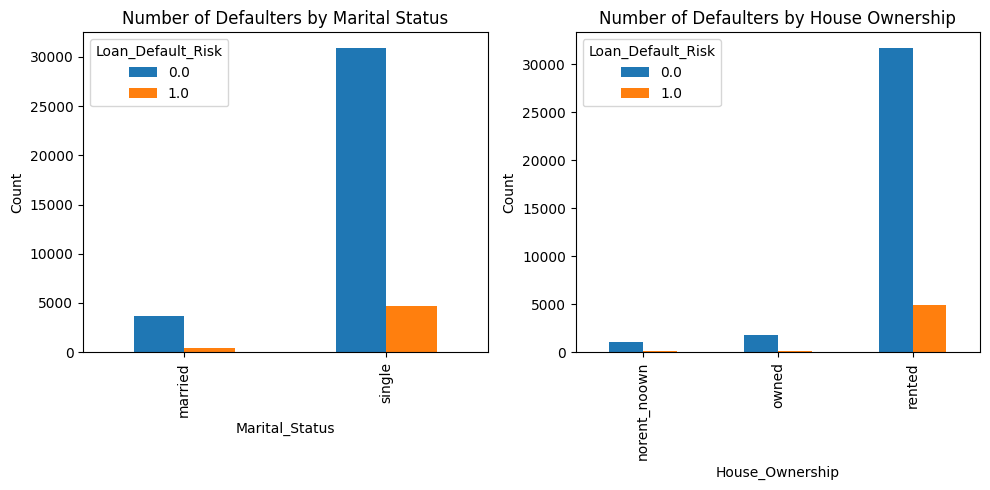

In [ ]:
mstatus = data.groupby(['Marital_Status','Loan_Default_Risk']).size().unstack()
hstatus = data.groupby(['House_Ownership','Loan_Default_Risk']).size().unstack()

fig,axes = plt.subplots(1,2,figsize=(10,5))
mstatus.plot(kind='bar',ax=axes[0])
axes[0].set_ylabel('Count')
axes[0].set_title('Number of Defaulters by Marital Status')
hstatus.plot(kind='bar',ax=axes[1])
axes[1].set_title('Number of Defaulters by House Ownership')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

<Figure size 6000x3000 with 0 Axes>

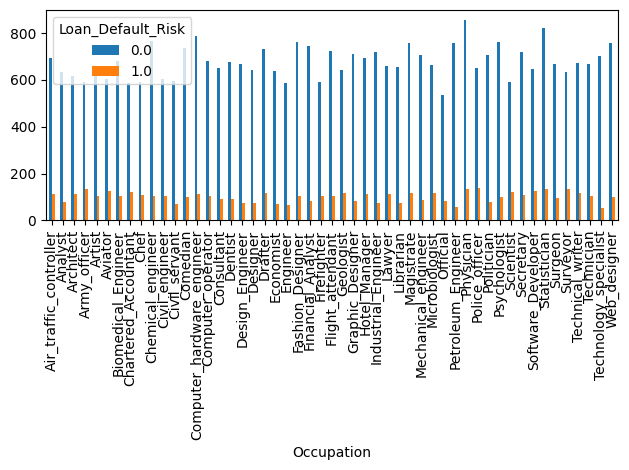

In [ ]:
defaulters_by_occupation = data.groupby(['Occupation','Loan_Default_Risk']).size().unstack()
defaulters_by_occupation.head()

# defaulters_by_occupation = defaulters_by_occupation.apply(pd.to_numeric, errors='coerce')

# # Convert the values to numeric
# defaulters_by_occupation = defaulters_by_occupation.apply(pd.to_numeric, errors='coerce')

# plt.figure(figsize=(30, 15))  # Increase the size of the graph

# ax = defaulters_by_occupation.plot(kind='bar', legend=False)
# plt.title('Defaulters by Occupation', fontsize=24)

# # Add percentage labels to the bars
# total_count = defaulters_by_occupation.sum().sum()
# for p in ax.patches:
#     percentage = '{:.2f}%'.format(100 * p.get_height() / total_count)  # Use 2 decimal places
#     x_pos = p.get_x() + p.get_width() / 2
#     y_pos = p.get_height() + 0.5
#     ax.annotate(percentage, (x_pos, y_pos), fontsize=14, ha='center', va='bottom')

# plt.xlabel('Occupation', fontsize=18)
# plt.ylabel('Count', fontsize=18)

# plt.tight_layout()
# plt.show()

plt.figure(figsize=(60,30))
defaulters_by_occupation.plot(kind='bar')
plt.tight_layout()
plt.show()

<ipython-input-10-98b803958b15>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Occupation', data=defaulters, palette='dark:#5A9_r', order=defaulters['Occupation'].value_counts().index)


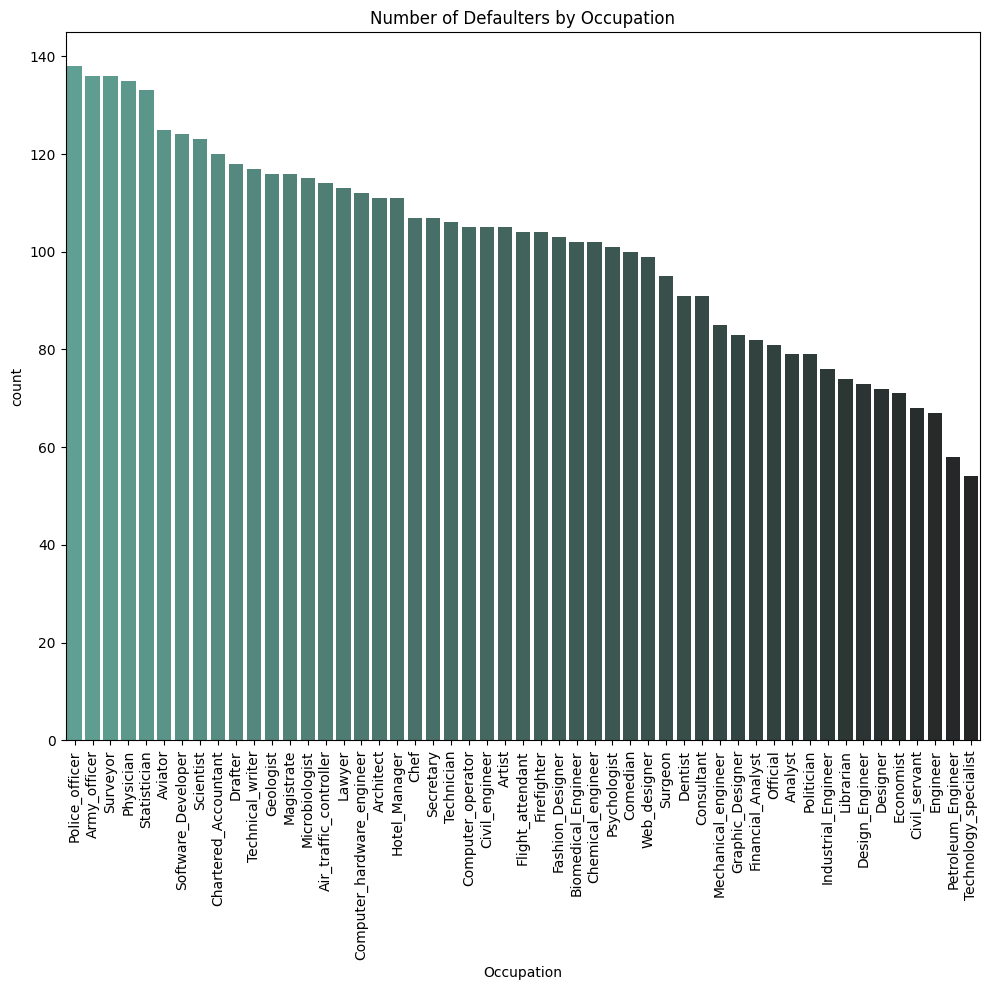

In [ ]:
defaulters = data[data.Loan_Default_Risk == 1]
defaulters.head()

plt.figure(figsize=(10, 10))
sns.countplot(x='Occupation', data=defaulters, palette='dark:#5A9_r', order=defaulters['Occupation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Defaulters by Occupation')
plt.tight_layout()
plt.show()

<ipython-input-11-6b1d142939fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Residence_State', data=defaulters, palette='ch:s=.25,rot=-.25', order=defaulters['Residence_State'].value_counts().index)


Text(0.5, 1.0, 'Number of Defaulters by Residence State')

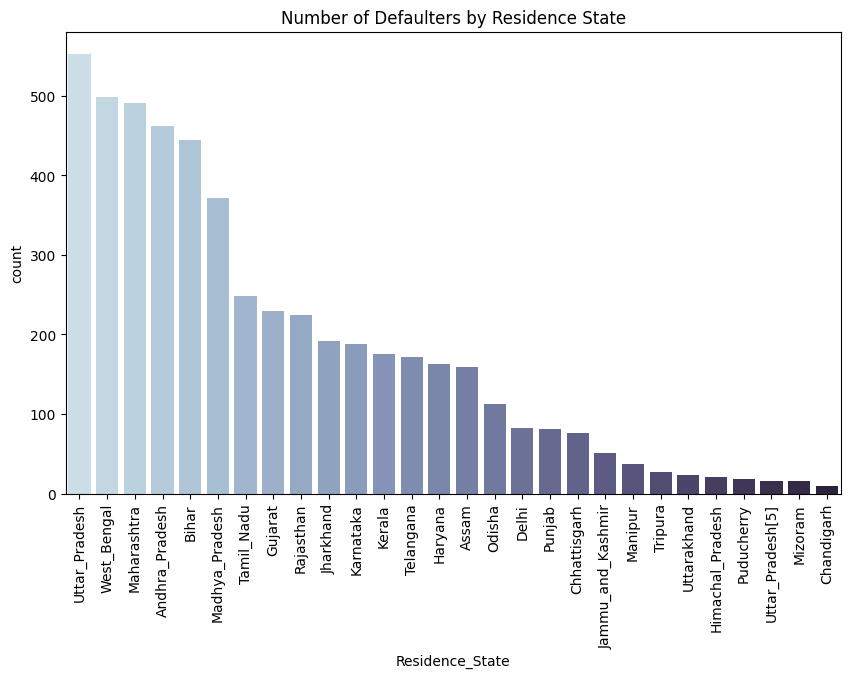

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x='Residence_State', data=defaulters, palette='ch:s=.25,rot=-.25', order=defaulters['Residence_State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Defaulters by Residence State')

In [ ]:
data.duplicated()
duplicate_rows = data[data.duplicated()]
duplicate_rows


,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.isnull()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39721,False,False,False,False,False,False,False,False,False,False,False,False,False
39722,False,False,False,False,False,False,False,False,False,False,False,False,False
39723,False,False,False,False,False,False,False,False,False,False,False,False,False
39724,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Applicant_ID                   0
Annual_Income                  1
Applicant_Age                  1
Work_Experience                1
Marital_Status                 1
House_Ownership                1
Vehicle_Ownership(car)         1
Occupation                     1
Residence_City                 1
Residence_State                1
Years_in_Current_Employment    1
Years_in_Current_Residence     1
Loan_Default_Risk              1
dtype: int64

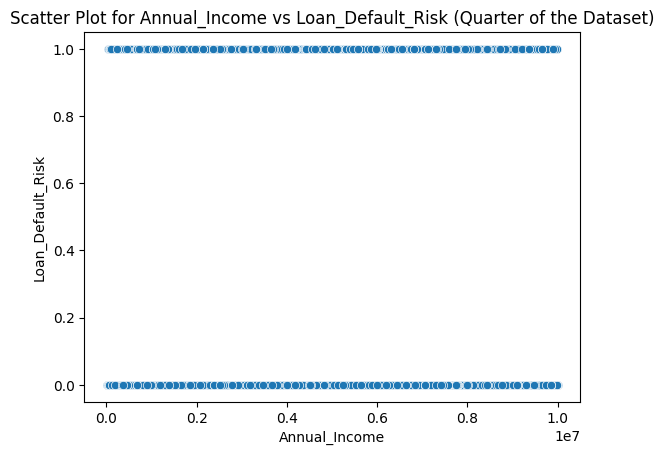

In [ ]:
# Replace 'Feature1' and 'Feature2' with the actual feature/column names
feature1_to_plot = 'Annual_Income'
feature2_to_plot = 'Loan_Default_Risk'

# Randomly select a quarter of the dataset
quarter_data = data.sample(frac=0.25, random_state=42)

# Scatter plot using seaborn
sns.scatterplot(x=quarter_data[feature1_to_plot], y=quarter_data[feature2_to_plot])
plt.title(f'Scatter Plot for {feature1_to_plot} vs {feature2_to_plot} (Quarter of the Dataset)')
plt.xlabel(feature1_to_plot)
plt.ylabel(feature2_to_plot)
plt.show()

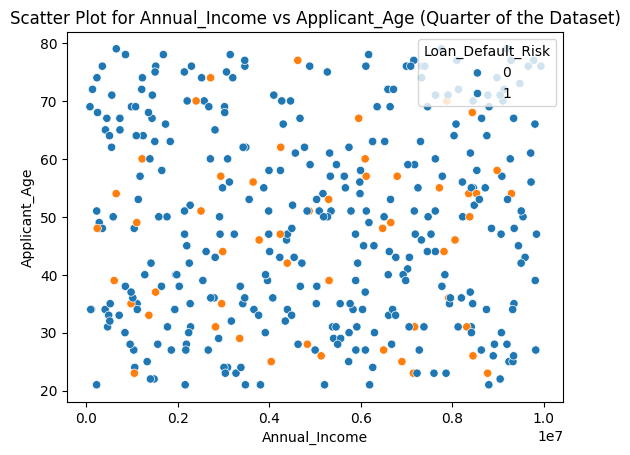

In [ ]:
# Replace 'Feature1' and 'Feature2' with the actual feature/column names
feature1_to_plot = 'Annual_Income'
feature2_to_plot = 'Applicant_Age'
target_column = 'Loan_Default_Risk'

# Randomly select a quarter of the dataset
quarter_data = data.sample(frac=0.01, random_state=42)

# Scatter plot with color-coded target values
sns.scatterplot(x=quarter_data[feature1_to_plot], y=quarter_data[feature2_to_plot], hue=quarter_data[target_column])
plt.title(f'Scatter Plot for {feature1_to_plot} vs {feature2_to_plot} (Quarter of the Dataset)')
plt.xlabel(feature1_to_plot)
plt.ylabel(feature2_to_plot)
plt.legend(title=target_column, loc='upper right', labels=[0, 1])
plt.show()

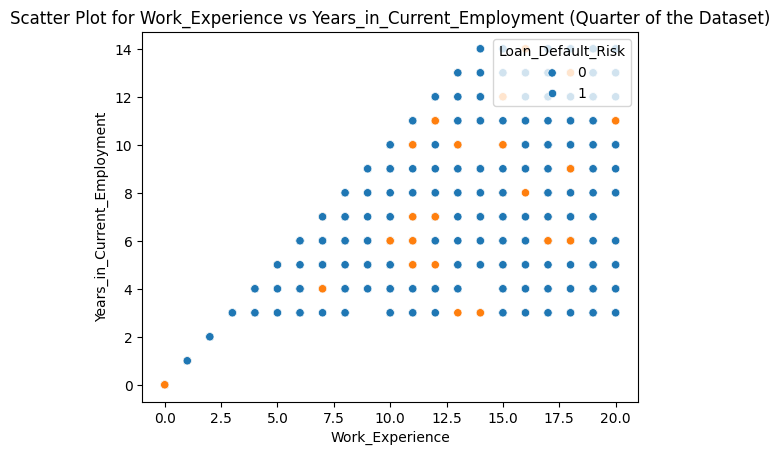

In [ ]:
# Replace 'Feature1' and 'Feature2' with the actual feature/column names
feature1_to_plot = 'Work_Experience'
feature2_to_plot = 'Years_in_Current_Employment'
target_column = 'Loan_Default_Risk'

# Randomly select a quarter of the dataset
quarter_data = data.sample(frac=0.02, random_state=42)

# Scatter plot with color-coded target values
sns.scatterplot(x=quarter_data[feature1_to_plot], y=quarter_data[feature2_to_plot], hue=quarter_data[target_column])
plt.title(f'Scatter Plot for {feature1_to_plot} vs {feature2_to_plot} (Quarter of the Dataset)')
plt.xlabel(feature1_to_plot)
plt.ylabel(feature2_to_plot)
plt.legend(title=target_column, loc='upper right', labels=[0, 1])
plt.show()

<ipython-input-19-3bfa15adf182>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method='spearman')



                              Applicant_ID  Annual_Income  Applicant_Age  \
Applicant_ID                     1.000000      -0.007112      -0.000276   
Annual_Income                   -0.007112       1.000000       0.001378   
Applicant_Age                   -0.000276       0.001378       1.000000   
Work_Experience                 -0.003935       0.009910      -0.000952   
Years_in_Current_Employment     -0.000403       0.008229       0.001467   
Years_in_Current_Residence       0.004105      -0.005324      -0.025241   
Loan_Default_Risk               -0.019501       0.004879      -0.030044   

                             Work_Experience  Years_in_Current_Employment  \
Applicant_ID                       -0.003935                    -0.000403   
Annual_Income                       0.009910                     0.008229   
Applicant_Age                      -0.000952                     0.001467   
Work_Experience                     1.000000                     0.638891   
Years_in_Cur

<Axes: >

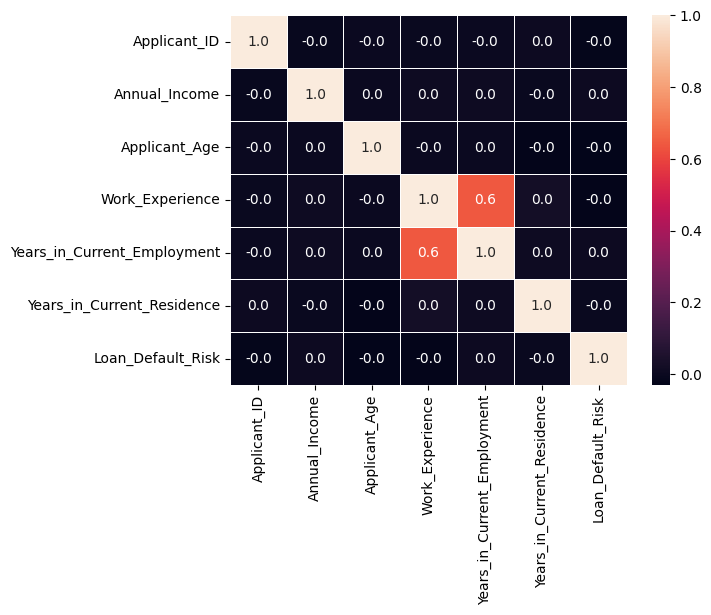

In [ ]:
# Using Sparman's (non-linear relationship) - doesn't assume normal distribution
corr = data.corr(method='spearman')
print ("\n",corr)
# Correlation matrix - Seaborn heatmap
sns.heatmap(data=corr, annot=True, linewidths=.5, fmt= '.1f')